In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('IRIS.csv')

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
X = df.iloc[ : ,0:4]
y = df.iloc[ : ,-1]

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [7]:
# encoding

le = LabelEncoder()
y_train_transformed = le.fit_transform(y_train)
y_test_transformed = le.transform(y_test)

In [8]:
y_test_transformed

array([2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 0, 2, 0, 0, 2, 1, 1])

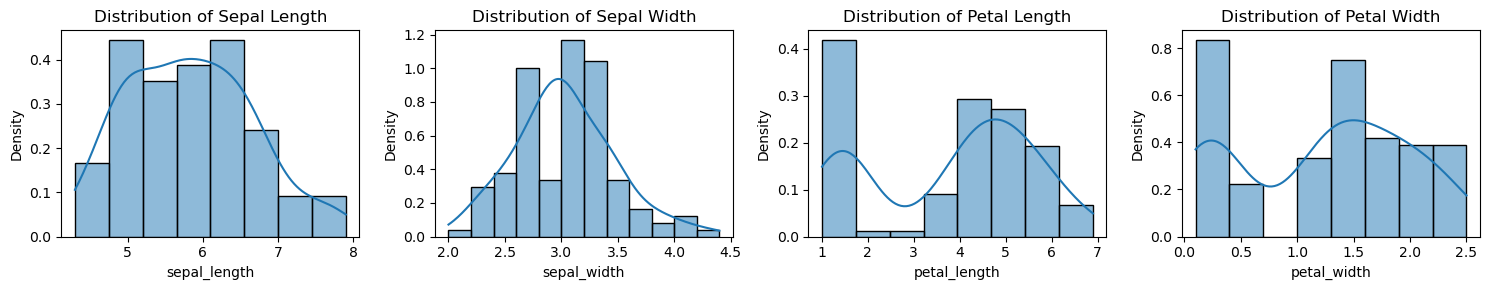

In [9]:
# Create a 1x4 grid of subplots
plt.figure(figsize=(15, 3))

# Plotting the distribution of 'sepal_length'
plt.subplot(1, 4, 1)
sns.histplot(X_train['sepal_length'],kde=True,stat='density')
plt.title('Distribution of Sepal Length')

# Plotting the distribution of 'sepal_width'
plt.subplot(1, 4, 2)
sns.histplot(X_train['sepal_width'],kde=True,stat='density')
plt.title('Distribution of Sepal Width')

# Plotting the distribution of 'petal_length'
plt.subplot(1, 4, 3)
sns.histplot(X_train['petal_length'],kde=True,stat='density')
plt.title('Distribution of Petal Length')

# Plotting the distribution of 'petal_width'
plt.subplot(1, 4, 4)
sns.histplot(X_train['petal_width'],kde=True,stat='density')
plt.title('Distribution of Petal Width')

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


In [10]:
# scaling

from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [12]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns = X_train.columns)

In [13]:
X_test_transformed = pd.DataFrame(X_test_transformed,columns = X_test.columns)

In [14]:
# model

reg = LogisticRegression()
reg.fit(X_train_transformed,y_train_transformed)

LogisticRegression()

In [15]:
y_pred = reg.predict(X_test_transformed)

In [16]:
# finding accuracy

accuracy_score(y_test_transformed,y_pred)

0.9666666666666667

In [17]:
#cross validation

X_transformed = scaler.fit_transform(X)
y_transformed = le.fit_transform(y)
np.mean(cross_val_score(reg,X_transformed,y_transformed,scoring = 'accuracy',cv=10))

0.9600000000000002